## Geographic EDA

### Overview of Geographic spread

In [16]:
# Load libraries and read the data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [71]:
# Read the data
map_data_path = 'data/cleaned/df_imdb_map.csv'
mbti_data_path = 'data/cleaned/df_mbti.csv'

fig_save_path = "output/Geographic_Img"

In [86]:
# print(set(world['continent']))


{'Asia', 'Oceania', 'Seven seas (open ocean)', 'Europe', 'South America', 'North America', 'Africa'}


In [87]:
# Loading the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Only keep the continents
world = world[world['continent'].isin(['Africa', 'Asia', 'Europe', 'North America', 'South America'])]

df_imdb_map = pd.read_csv(map_data_path)

df_mbti = pd.read_csv(mbti_data_path)

/var/folders/m4/lr92jqdj1_z4cm26h66ndqy40000gn/T/ipykernel_66477/3937936985.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [88]:
print(world.head())

       pop_est      continent                      name iso_a3  gdp_md_est  \
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   
5   18513930.0           Asia                Kazakhstan    KAZ      181665   

                                            geometry  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
5  POLYGON ((87.35997 49.21498, 86.59878 48.54918...  


In [89]:
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()
average_scores_revenues.head()

,country,score,revenue
0,AR,66.073171,4.565608e+08
1,AT,67.000000,7.228277e+07
2,AU,66.706039,1.929454e+08
3,BE,55.571429,3.283100e+08
4,BO,52.000000,6.383325e+08


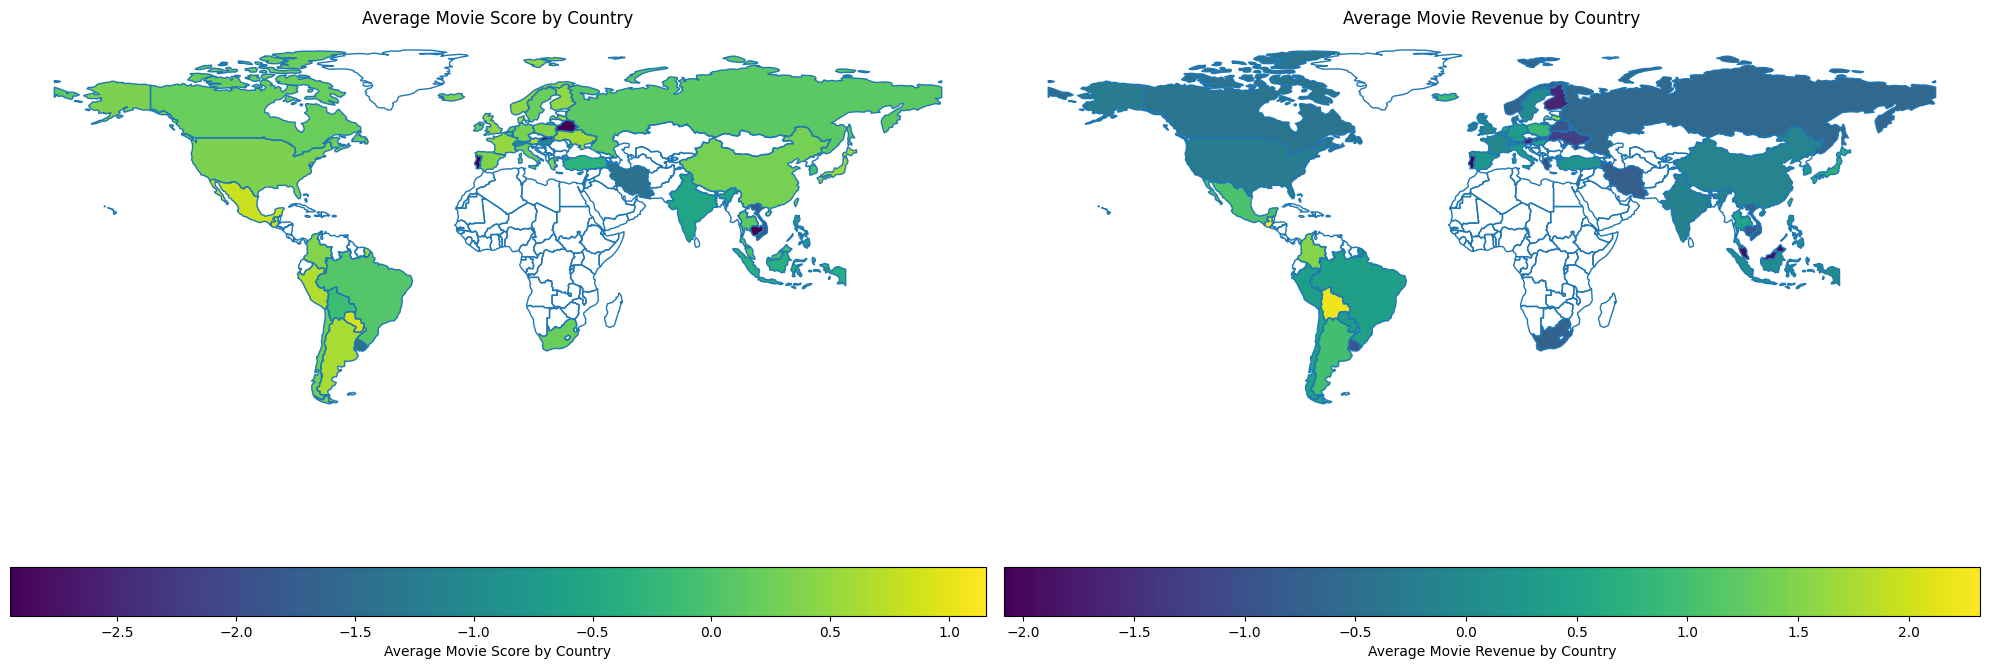

In [90]:
# Creating a mapping of country codes in the movie dataset to country names in the world map dataset
# This requires some knowledge of country codes and names
country_mapping = {
    'AR': 'Argentina',
    'AT': 'Austria',
    'AU': 'Australia',
    'BE': 'Belgium',
    'BO': 'Bolivia',
    'BR': 'Brazil',
    'BY': 'Belarus',
    'CA': 'Canada',
    'CH': 'Switzerland',
    'CL': 'Chile',
    'CN': 'China',
    'CO': 'Colombia',
    'CZ': 'Czech Republic',
    'DE': 'Germany',
    'DK': 'Denmark',
    'DO': 'Dominican Republic',
    'ES': 'Spain',
    'FI': 'Finland',
    'FR': 'France',
    'GB': 'United Kingdom',
    'GR': 'Greece',
    'GT': 'Guatemala',
    'HK': 'Hong Kong',
    'HU': 'Hungary',
    'ID': 'Indonesia',
    'IE': 'Ireland',
    'IL': 'Israel',
    'IN': 'India',
    'IR': 'Iran',
    'IS': 'Iceland',
    'IT': 'Italy',
    'JP': 'Japan',
    'KH': 'Cambodia',
    'KR': 'South Korea',
    'LV': 'Latvia',
    'MU': 'Mauritius',
    'MX': 'Mexico',
    'MY': 'Malaysia',
    'NL': 'Netherlands',
    'NO': 'Norway',
    'PE': 'Peru',
    'PH': 'Philippines',
    'PL': 'Poland',
    'PR': 'Puerto Rico',
    'PT': 'Portugal',
    'PY': 'Paraguay',
    'RU': 'Russia',
    'SE': 'Sweden',
    'SG': 'Singapore',
    'SK': 'Slovakia',
    'SU': 'Soviet Union',
    'TH': 'Thailand',
    'TR': 'Turkey',
    'TW': 'Taiwan',
    'UA': 'Ukraine',
    'US': 'United States of America',
    'UY': 'Uruguay',
    'VN': 'Vietnam',
    'XC': 'Czechoslovakia',
    'ZA': 'South Africa'
}

# Mapping the country codes to country names in the movie dataset
df_imdb_map['country'] = df_imdb_map['country'].map(country_mapping).fillna(df_imdb_map['country'])

# Now let's try merging again and plotting on the map
# Merging our movie data with the world map data again

# Creating a dataframe for average score and revenue by country to merge with the world map
average_scores_revenues = df_imdb_map.groupby('country').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Standardizing the data
from sklearn.preprocessing import StandardScaler
average_scores_revenues['score'] = StandardScaler().fit_transform(average_scores_revenues[['score']])
average_scores_revenues['revenue'] = StandardScaler().fit_transform(average_scores_revenues[['revenue']])

# Merging with the world map data
world_average = world.merge(average_scores_revenues, left_on='name', right_on="country", how='left')

# print(world.head())

# Plotting the data on the world map
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot for average movie score by country
world_average.boundary.plot(ax=axes[0], linewidth=1)
world_average.plot(column='score', ax=axes[0], legend=True, legend_kwds={'label': "Average Movie Score by Country", 'orientation': "horizontal"})
axes[0].set_title('Average Movie Score by Country')
axes[0].axis('off')

# Plot for average movie revenue by country
world_average.boundary.plot(ax=axes[1], linewidth=1)


world_average.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={'label': "Average Movie Revenue by Country", 'orientation': "horizontal"})
axes[1].set_title('Average Movie Revenue by Country')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# save the figure
fig.savefig(fig_save_path + "/average_score_revenue_map.png")


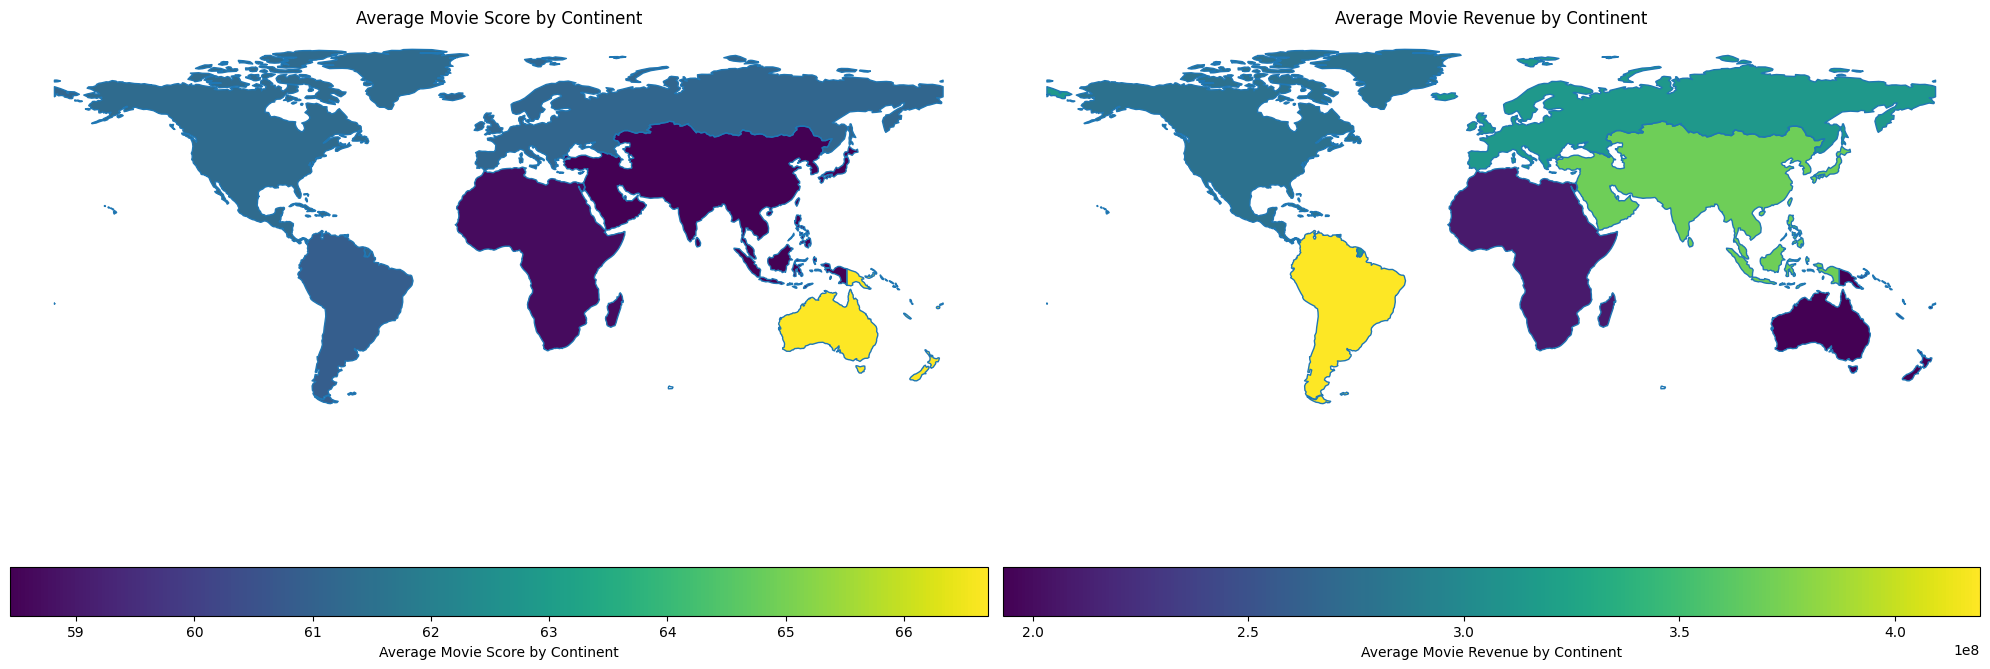

In [82]:
# instead of grouping by country, we can group by continent
# Creating a dataframe for average score and revenue by continent to merge with the world map
# Create a continent column in the movie dataset 
# This requires some knowledge of country codes and names
#Creating a mapping of countries to continents
country_continent_mapping = world[['name', 'continent']].drop_duplicates().set_index('name')['continent'].to_dict()

# Mapping the countries in the movie dataset to continents
df_imdb_map['continent'] = df_imdb_map['country'].map(country_continent_mapping)

# Grouping by continent and calculating average score and revenue
continent_averages = df_imdb_map.groupby('continent').agg({'score': 'mean', 'revenue': 'mean'}).reset_index()

# Merging the aggregated data with the world map data frame for continents
world_continents = world[['continent', 'geometry']].dissolve(by='continent')

# Merging the aggregated data with the world map data for continents
world_continents = world_continents.merge(continent_averages, left_on='continent', right_on='continent', how='left')

# Plotting the data on the world map for continents
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# Plot for average movie score by continent
world_continents.boundary.plot(ax=axes[0], linewidth=1)
world_continents.plot(column='score', ax=axes[0], legend=True, legend_kwds={'label': "Average Movie Score by Continent", 'orientation': "horizontal"})
axes[0].set_title('Average Movie Score by Continent')
axes[0].axis('off')

# Plot for average movie revenue by continent
world_continents.boundary.plot(ax=axes[1], linewidth=1)
world_continents.plot(column='revenue', ax=axes[1], legend=True, legend_kwds={'label': "Average Movie Revenue by Continent", 'orientation': "horizontal"})
axes[1].set_title('Average Movie Revenue by Continent')
axes[1].axis('off')

plt.tight_layout()
plt.show()






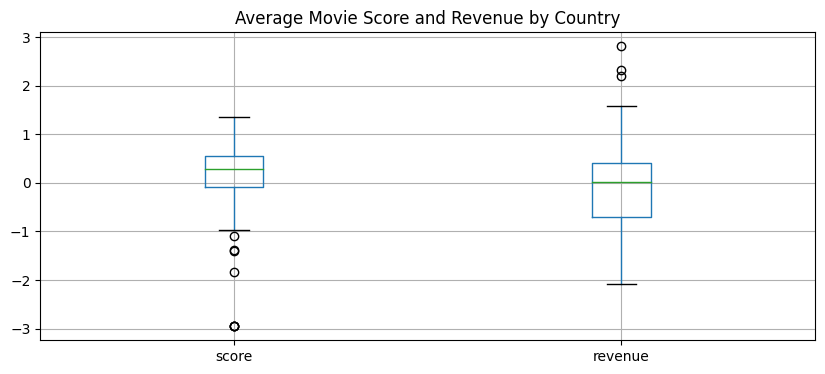

In [91]:


# Boxplot for average movie score and revenue by country
average_scores_revenues.boxplot(column=['score', 'revenue'], figsize=(10, 4))
plt.title('Average Movie Score and Revenue by Country')
plt.show()

# save the figure
fig.savefig(fig_save_path + "/average_score_revenue_boxplot.png")


**Scores tend to have lower outlier and revenues tend to have higher outlier**

In [92]:
# Generating the count for each of the 16 MBTI personalities in each movie
mbti_counts = df_mbti.groupby(['movie_name', 'mbti']).size().unstack(fill_value=0)

mbti_counts_reset = mbti_counts.reset_index()
mbti_counts_reset.columns.name = None

# Displaying the counts
mbti_counts_reset.head()

,movie_name,ENFJ,ENFP,ENTJ,ENTP,ESFJ,ESFP,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,#Alive,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,...And Justice For All,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
2,07/27/1978,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,10 Cloverfield Lane,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0
4,10 Things I Hate About You,1,0,0,1,1,0,0,0,0,2,1,0,0,0,0,1


In [93]:
# merge the data to the original movie dataset
df_imdb_mbti = df_imdb_map.merge(mbti_counts_reset, left_on='movie_name', right_on='movie_name', how='left')

In [94]:
df_imdb_mbti.drop('Unnamed: 0', axis=1, inplace=True)

In [95]:
df_imdb_mbti.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,ENFJ,ENFP,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,Creed Iii,2023-03-02,73.0,"Drama, Action",75000000.0,2.716167e+08,Australia,2023.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Avatar: The Way Of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,Australia,2022.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,Australia,2023.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,Australia,2023.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Supercell,2023-03-17,61.0,Action,77000000.0,3.409420e+08,United States of America,2023.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
# fillna in each columns with the mean of the column values group by country
numeric_columns = df_imdb_mbti.select_dtypes(include=['number']).columns
df_imdb_mbti[numeric_columns] = df_imdb_mbti.groupby('country')[numeric_columns].transform(lambda x: x.fillna(x.mean()))

In [97]:
df_imdb_mbti.head()

,movie_name,release_date,score,genre,budget,revenue,country,release_year,ENFJ,ENFP,...,ESTJ,ESTP,INFJ,INFP,INTJ,INTP,ISFJ,ISFP,ISTJ,ISTP
0,Creed Iii,2023-03-02,73.0,"Drama, Action",75000000.0,2.716167e+08,Australia,2023.0,0.295368,0.343324,...,0.547684,0.596730,0.344414,0.365123,0.295368,0.272480,0.514441,0.536240,0.529700,0.470300
1,Avatar: The Way Of Water,2022-12-15,78.0,"Science Fiction, Adventure, Action",460000000.0,2.316795e+09,Australia,2022.0,0.295368,0.343324,...,0.547684,0.596730,0.344414,0.365123,0.295368,0.272480,0.514441,0.536240,0.529700,0.470300
2,The Super Mario Bros. Movie,2023-04-05,76.0,"Animation, Adventure, Family, Fantasy, Comedy",100000000.0,7.244590e+08,Australia,2023.0,0.295368,0.343324,...,0.547684,0.596730,0.344414,0.365123,0.295368,0.272480,0.514441,0.536240,0.529700,0.470300
3,Mummies,2023-01-05,70.0,"Animation, Comedy, Family, Adventure, Fantasy",12300000.0,3.420000e+07,Australia,2023.0,0.295368,0.343324,...,0.547684,0.596730,0.344414,0.365123,0.295368,0.272480,0.514441,0.536240,0.529700,0.470300
4,Supercell,2023-03-17,61.0,Action,77000000.0,3.409420e+08,United States of America,2023.0,0.266289,0.280453,...,0.402266,0.461756,0.311615,0.356941,0.201133,0.175637,0.552408,0.458924,0.351275,0.368272


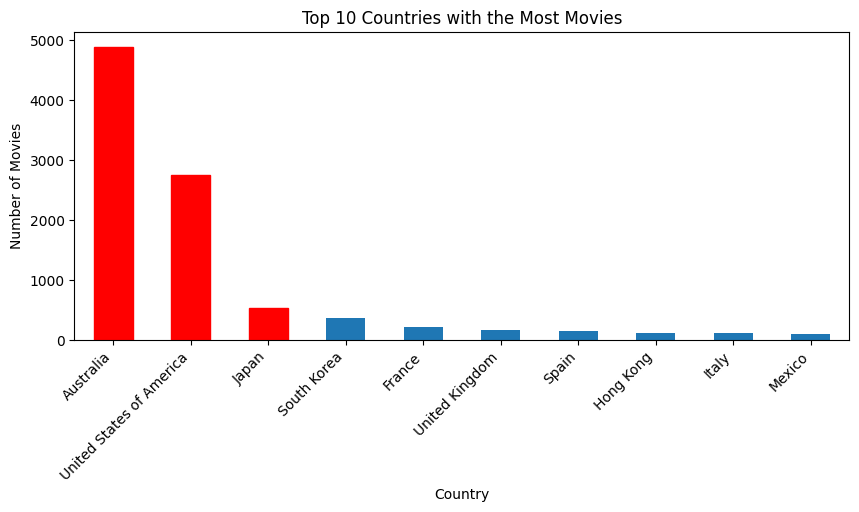

In [98]:
## List the top 10 countries with the most movies
top_count = df_imdb_mbti['country'].value_counts().head(10)

## Plot them and highlight the top 3
plt.figure(figsize=(10, 4))
ax = plt.gca()
top_count.plot.bar(ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_title('Top 10 Countries with the Most Movies')
ax.set_xlabel('Country')
ax.set_ylabel('Number of Movies')

# Highlighting the top 3 countries
for i in range(3):
    ax.get_children()[i].set_color('red')

# save the figure
fig.savefig(fig_save_path + "/top_10_countries.png")


In [ ]:
## Plot the 